#  Homework 2
## Regularization, Logistic Regression


**Harvard University**<br/>
**Summer 2019**<br/>
**Instructor**: Pavlos Protopapas <br>
**Homework prepared by:** David Sondak and Andrea Porelli

---

### INSTRUCTIONS

- Submisson instructions:
  - Submit your Jupyter notebook to the teaching staff in an email.
  - The email should have the following subject:  gec-summer-2019 HW 2 "Your Name"
    - e.g. gec-summer2019 HW2 David Sondak
    
    **Homeworks with the wrong subject line will recieve a 0.**
  - The due date is Friday, August 23rd at 23:59 PM EDT.  Please note the time-zone!
    ** No late days!**

- Restart the kernel and run the whole notebook again before you submit. 
---

##### Import Libraries

In [119]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# Part 1 [25 pts]: Regularization
## Problem Description:  Forecasting Bike Sharing Usage
Part 1 of this homework (HW2) continues Part 2 of HW1.  You will continue to build regression models for the Capital Bikeshare program in Washington D.C.  Part 2 of HW1 contains a detailed description of the dataset in case you need a reminder.

**Important:** The present problem (Part 1 of HW2) assumes that you have already pre-processed the dataset.  If you did not save the processed data from subparts $2.1$ and $2.2$ in HW1, then you must redo the pre-processing.  Specifically>
* You must convert categorical attributes into multiple binary attributes using one-hot encoding.
* Scale each continuous predictor to have zero mean and a standard deviation of  $1$.
See subpart $2.2$ in HW1 for even more details.

##### Goals of this Part
You will fit a multilinear regression model using using lasso and ridge regression and compare their performance.

In [120]:
dfbike_train = pd.read_csv("BikeShare_train_Pre_Processed")
dfbike_test = pd.read_csv("BikeShare_test_Pre_Processed")
aaaaa = dfbike_train.pop("Unnamed: 0")
bbbbbb = dfbike_test.pop("Unnamed: 0")

## Part 1.1 [25 pts]:  Ridge and Lasso Regression

### Part 1.1.1 [6 pts]:  Fit Linear, Ridge, and Lasso Regression Models
Use the following regression techniques to fit linear models to the training set:
- Ridge regression
- Lasso regression

Choose the regularization parameter $\lambda$ from the set $\{0.001, 0.005,..., 50, 100\}$ using cross-validation.

#### Hints
- You may use `sklearn`'s `LinearRegression`, `RidgeCV` and `LassoCV` classes to implement Linear, Ridge, and Lasso regression. These classes automatically perform cross-validation to tune the parameter $\lambda$ from a given range of values.
- You may use the `plt.errorbar` function to plot confidence bars for the average $R^2$ scores.

#### Deliverables
Your code should be contained in a Jupyter notebook cell.  An appropriate level of comments is necessary.  Your code should run and output the required outputs described below.

#### Required Outputs
- Print the train and test $R^2$ scores for each model

In [121]:
ytrain = dfbike_train.pop("TotalCount").values
xtrain = dfbike_train.values
ytest = dfbike_test.pop("TotalCount").values
xtest = dfbike_test.values

In [122]:
parameters = [1e-3,5e-3,1e-2,5e-2,1e-1,5e-1,1.0,5.0,10.0,50.0,100]

In [123]:
#Linear

#create linear model
Linear = LinearRegression()
#fit linear model
Linear.fit(xtrain, ytrain)
#calculate the score
rl_train = Linear.score(xtrain,ytrain)
rl_test = Linear.score(xtest,ytest)
Linear.fit(xtrain, ytrain).coef_

array([-1226.18654265,  -327.35750316,  -193.30496781,   118.83581872,
         207.77591139,   358.01671712,   452.18490513,    53.02331873,
        -673.42707979, -1161.15118754,  -657.63967119,   523.98038482,
         605.08672238,   231.51746394,  -284.35627461,  -123.75147639,
        -195.28593262,   170.51134687,    61.25602987,   111.06689939,
         465.14500996,   308.15314174,   532.84828921,   516.28170519,
       -1049.1299944 ,   925.73384986,   312.43407189,  -548.49294906,
        -255.12258899])

In [124]:
print("The trainning R^2 score for LinearRegression is:",rl_train)
print("The test R^2 score for LinearRegression is:",rl_test)

The trainning R^2 score for LinearRegression is: 0.5761281783129482
The test R^2 score for LinearRegression is: 0.24934211146527585


In [125]:
#Ridge Regression
Ridgecv = RidgeCV(alphas = parameters,cv =5)
Ridgecv.fit(xtrain, ytrain)
Ridgecv.coef_

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


array([-756.35687422,  -46.24239008, -206.59399592, -264.68139026,
       -116.84402906,   47.87279984,  235.57094496,   44.18274714,
       -345.33116773, -555.92738515, -151.07220468,  634.6221518 ,
        592.17736542,  198.8657023 , -138.30319184, -147.54958951,
       -111.19001773,  133.74219883,   75.83526186,  132.73303016,
        301.20139789,  221.87407545,  330.40408652,  271.66651755,
       -602.07060407,  584.46653948,  504.81332857, -520.38687789,
       -255.17415861])

In [126]:
print("The trainning R^2 score for RidgeRegression is:",Ridgecv.score(xtrain, ytrain))
print("The test R^2 score for RidgeRegression is:",Ridgecv.score(xtest, ytest))

The trainning R^2 score for RidgeRegression is: 0.5649824850760301
The test R^2 score for RidgeRegression is: 0.26590265359595977


In [127]:
#Lassso Regression
Lassocv = LassoCV(alphas = parameters,cv =5)
Lassocv.fit(xtrain, ytrain)
Lassocv.coef_

array([ -971.81838473,    -0.        ,  -199.80366558,  -101.08630071,
          -0.        ,     7.0974008 ,   120.21876761,    -0.        ,
        -390.86903815,  -616.94674103,   -89.53378582,   729.41357022,
         649.67674781,   127.60175054,    -0.        ,  -181.06798011,
        -124.55983098,    42.03772449,     0.        ,    28.22084838,
         288.69312623,   263.91235961,    32.52739996,     0.        ,
       -1161.91477484,   614.16673322,   446.53863622,  -524.60661414,
        -239.58947365])

In [128]:
print("The trainning R^2 score for LassoRegression is:",Lassocv.score(xtrain, ytrain))
print("The test R^2 score for LassoRegression is:",Lassocv.score(xtest, ytest))

The trainning R^2 score for LassoRegression is: 0.5673604742407818
The test R^2 score for LassoRegression is: 0.2694087898541282


In [129]:
print('The Max coef of Linear, Lasso & Ridge:{}, {}, {}'.format(np.amax(Linear.fit(xtrain, ytrain).coef_),np.amax(Lassocv.coef_),np.amax(Ridgecv.coef_)))
print('The Min coef of Linear, Lasso & Ridge:{}, {}, {}'.format(np.amin(Linear.fit(xtrain, ytrain).coef_),np.amin(Lassocv.coef_),np.amin(Ridgecv.coef_)))

The Max coef of Linear, Lasso & Ridge:925.7338498566305, 729.4135702249367, 634.6221518026371
The Min coef of Linear, Lasso & Ridge:-1226.1865426521533, -1161.9147748410726, -756.3568742204708


In [130]:
Columns = dfbike_train.columns.values
index = np.argwhere(abs(Lassocv.coef_)<1e-10)
q3 = Columns[index]
print('For LASSO, the predictors with 0 coefficient are:{}'.format(q3.reshape(1,-1)))

For LASSO, the predictors with 0 coefficient are:[['Summer' 'Feb' 'May' 'is_holiday' 'Thu' 'weather_2.0']]


### 1.1.2 [4 pts]:  Discuss your results by answering the following questions:
1. [1 pt] How do the estimated coefficients compare to or differ from the coefficients estimated by a plain linear regression (without regularzation)?

  * The range of the coefficient from the plain linear regression is about (-1226,925), while the range of LASSO and Ridge are (729,-1161) and (634,-756) respectively. Clearly, the value of the last two are less extreme than that of the plain linear regression.


2. [1 pt] Is there a difference between coefficients estimated by the two shrinkage methods? If so, give an explantion for the difference.

  * We can see that some coefficients appear to be 0 in the lasso regression, but not in the ridge regression. When a lasso regression processes a set of highly linearly related variables, one of the coefficients is retained and the remaining coefficients are changed to zero.


3. [1 pt] List the predictors that are assigned a coefficient value close to 0 (say < 1e-10) by the two methods.

  * For LASSO, the predictors with 0 coefficient are:[['Summer' 'Feb' 'May' 'is_holiday' 'Thu' 'weather_2.0']]
    For Ridge, there is no such coefficient.
    

4. [1 pt] Is there a difference in the way Ridge and Lasso regression assign coefficients to the predictors `temp` and `atemp`? If so, explain the reason for the difference.

  * Both lasso and ridge regression tends to shrink the estimates of the coefficients to zero. However, the former regression model force some coefficients to become zeros when they don’t have collinear relationships. And coefficients of those predictors who are colinear, the values will be non zero. The latter model, ridge regression, will not produce estimated coefficients equal to zero unless λ is infinite. Thus, none of the coefficients or terms in the model will be removed.

### 1.1.3 [12 pts]:  Analyze the performance of the two regularization methods for different training sample sizes
It would be nice to assess the performance of the regularization methods to figure out which one works better.  To do this, you will execute the following steps:
- Generate random samples of sizes 100, 150, ..., 400 from the training set.
- Do a random split of the data at each sample size.  You will do this 10 times.
- Fit linear, Ridge and Lasso models on each training set.
- Calculate the mean $R^2$ score and it's standard deviation (SD) for each model.
- Compare the performance.

#### Hints
- You may use the following code to draw a random sample of a specified size from the training set:

```python
#--------  sample
# A function to select a random sample of size k from the training set
# Input: 
#      x (n x d array of predictors in training data)
#      y (n x 1 array of response variable vals in training data)
#      k (size of sample) 
# Return: 
#      chosen sample of predictors and responses

def sample(x, y, k):
    n = x.shape[0] # No. of training points
    
    # Choose random indices of size 'k'
    subset_ind = np.random.choice(np.arange(n), k.astype(int))
    
    # Get predictors and reponses with the indices
    x_subset = x[subset_ind, :]
    y_subset = y[subset_ind]
    
    return (x_subset, y_subset)
```

#### Deliverables
Your code should be contained in a Jupyter notebook cell.  An appropriate level of comments is necessary.  Your code should run and output the required outputs described below.

#### Required Outputs
- Fit Linear, Ridge and Lasso regression models to each of the generated samples. 
  - In each case, compute the $R^2$ score for the model on the training sample on which it was fitted and on the test set.
- Repeat the above experiment for $10$ random trials
  - Compute the average train and test $R^2$ across the trials for each training sample size.
  - Compute the standard deviation (SD) in each case.
- Make a plot of the mean training $R^2$ scores for the Linear, Ridge and Lasso regression methods as a function of the training sample size.
- Show a confidence interval for the mean scores extending from **mean - SD** to **mean + SD**.
- Make a similar plot for the test $R^2$ scores.

In [336]:
def sample(x, y, k):
    n = x.shape[0] # No. of training points

    # Choose random indices of size 'k'
    subset_ind = np.random.choice(np.arange(n), k)

    # Get predictors and reponses with the indices
    x_subset = x[subset_ind, :]
    y_subset = y[subset_ind]

    return (x_subset, y_subset)

In [337]:
k_set = [100,150,200,250,300,350,400]

In [338]:
alphs = [1e-3,5e-3,1e-2,5e-2,1e-1,5e-1,1.0,5.0,10.0,50.0,100]

score_lin_train = {}
score_lin_test = {}
score_lasso_train = {}
score_lasso_test = {}
score_ridge_train = {}
score_ridge_test = {}

for k in k_set:
    score_lin_train[k] = {}
    score_lin_test[k] = {}
    score_lasso_train[k] = {}
    score_lasso_test[k] = {}
    score_ridge_train[k] = {}
    score_ridge_test[k] = {}
    # Repeat random sampling for 10 times and store R^2 for both training and test set
    for i in range(10):
        # Draw subsamples
        x, y = sample(xtrain, ytrain, k)
        # For linear reg
        result_lin = LinearRegression().fit(x, y)
        score_lin_train[k][i] = result_lin.score(x, y)
        score_lin_test[k][i] = result_lin.score(xtest, ytest)
        # For LASSO
        result_LA = LassoCV(alphas=alphs).fit(x, y)
        score_lasso_train[k][i] = result_LA.score(x, y)
        score_lasso_test[k][i] = result_LA.score(xtest, ytest)
        # For Ridge
        result_R = RidgeCV(alphas=alphs).fit(x, y)
        score_ridge_train[k][i] = result_R.score(x, y)
        score_ridge_test[k][i] = result_R.score(xtest, ytest)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53305.832600452006, tolerance: 20733.78758181818
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56481.75443546474, tolerance: 20733.78758181818
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packag

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70766.16331975162, tolerance: 21032.264153030304
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30773.043111637235, tolerance: 26998.890179104485
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 313076.2549285367, tolerance: 26998.890179104485
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versi

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250408.7716127336, tolerance: 17533.584564179106
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1844184.4799648076, tolerance: 17533.584564179106
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171630.8960602656, tolerance: 23746.56407462687
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versio

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70970.36446967721, tolerance: 41035.556875
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_d

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 850338.7011007667, tolerance: 38694.6572
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92064.31488315761, tolerance: 38694.6572
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 676977.7248107791, tolerance: 38694.6572
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/sit

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434234.39838922024, tolerance: 45691.04006766918
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64464.20618250966, tolerance: 45691.04006766918
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packag

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151279.4876280427, tolerance: 56919.57053173654
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154268.6413333416, tolerance: 56919.57053173654
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153166.4135929942, tolerance: 56919.57053173654
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95299.39933997393, tolerance: 60837.13397485031
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_spl

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354539.8539056182, tolerance: 78343.63979550001
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210322.6227632165, tolerance: 78343.63979550001
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177123.10744005442, tolerance: 78343.63979550001
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 471689.91259920597, tolerance: 78071.56435
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 458194.96523192525, tolerance: 78071.56435
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168652.54221981764, tolerance: 100608.30533872181
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coord

In [339]:
mean_lin_train = {}
std_lin_train = {}
mean_lin_test = {}
std_lin_test = {}
mean_lasso_train = {}
std_lasso_train = {}
mean_lasso_test = {}
std_lasso_test = {}
mean_ridge_train = {}
std_ridge_train = {}
mean_ridge_test = {}
std_ridge_test = {}

for k in k_set:
    mean_lin_train[k] = np.mean(list(score_lin_train[k].values()))
    std_lin_train[k] = np.std(list(score_lin_train[k].values()))
    mean_lin_test[k] = np.mean(list(score_lin_test[k].values()))
    std_lin_test[k] = np.std(list(score_lin_test[k].values()))
    mean_lasso_train[k] = np.mean(list(score_lasso_train[k].values()))
    std_lasso_train[k] = np.std(list(score_lasso_train[k].values()))
    mean_lasso_test[k] = np.mean(list(score_lasso_test[k].values()))
    std_lasso_test[k] = np.std(list(score_lasso_test[k].values()))
    mean_ridge_train[k] = np.mean(list(score_ridge_train[k].values()))
    std_ridge_train[k] = np.std(list(score_ridge_train[k].values()))
    mean_ridge_test[k] = np.mean(list(score_ridge_test[k].values()))
    std_ridge_test[k] = np.std(list(score_ridge_test[k].values()))

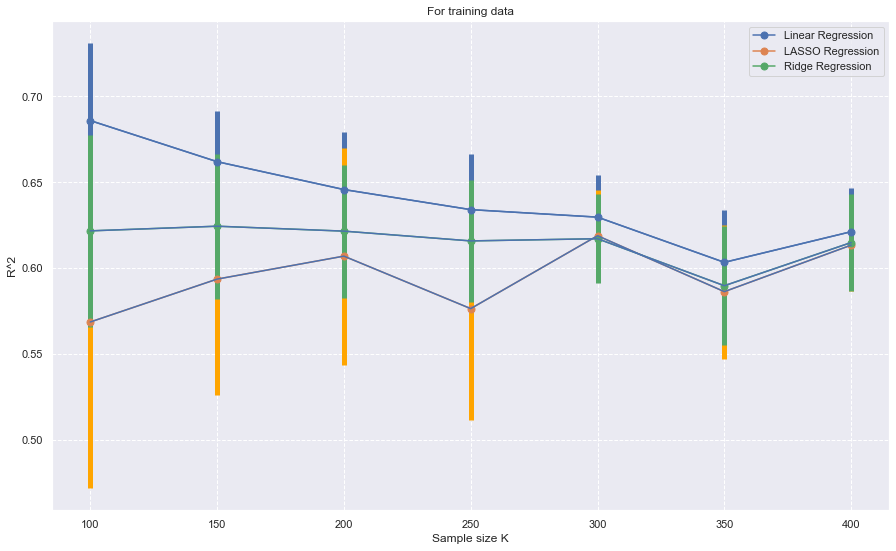

In [340]:
plt.rcParams["figure.figsize"] = (15,9)
plt.rcParams.update({'font.size': 15})

plt.plot(k_set, list(mean_lin_train.values()), 'o-', ms=7, label='Linear Regression')
plt.errorbar(k_set, mean_lin_train.values(), yerr=std_lin_train.values(), ecolor='b', elinewidth=5)
plt.plot(k_set, list(mean_lasso_train.values()), 'o-', ms=7, label='LASSO Regression')
plt.errorbar(k_set, mean_lasso_train.values(), yerr=std_lasso_train.values(), ecolor='orange', elinewidth=5)
plt.plot(k_set, list(mean_ridge_train.values()), 'o-', ms=7, label='Ridge Regression')
plt.errorbar(k_set, mean_ridge_train.values(), yerr=std_ridge_train.values(), ecolor='g', elinewidth=5)
plt.grid(linestyle='--', linewidth=1)
plt.legend()
plt.xlabel("Sample size K")
plt.ylabel("R^2")
plt.title("For training data")
plt.show()

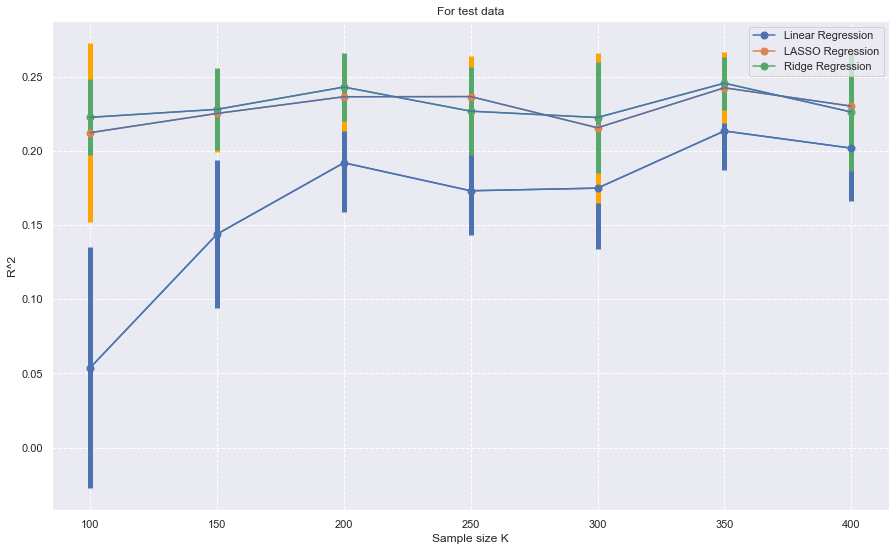

In [341]:
plt.plot(k_set, list(mean_lin_test.values()), 'o-', ms=7, label='Linear Regression')
plt.errorbar(k_set, mean_lin_test.values(), yerr=std_lin_test.values(), ecolor='b', elinewidth=5)
plt.plot(k_set, list(mean_lasso_test.values()), 'o-', ms=7, label='LASSO Regression')
plt.errorbar(k_set, mean_lasso_test.values(), yerr=std_lasso_test.values(), ecolor='orange', elinewidth=5)
plt.plot(k_set, list(mean_ridge_test.values()), 'o-', ms=7, label='Ridge Regression')
plt.errorbar(k_set, mean_ridge_test.values(), yerr=std_ridge_test.values(), ecolor='g', elinewidth=5)
plt.grid(linestyle='--', linewidth=1)
plt.legend()
plt.xlabel("Sample size K")
plt.ylabel("R^2")
plt.title("For test data")
plt.show()

### 1.1.4 [3 pts]:  Discuss your results by answering the following questions:
1. [1 pt] How do the training and test $R^2$ scores compare for the three methods? Give an explanation for your observations.

  * In the training set, the residual of the linear regression is significantly better than the other two models;
    this maybe because the too many features and too less data, which will lead to overfitting. 
  
    in the test set, the linear regression model is the worst. This maybe because the two shrinkage model solve the collinearity for the predictors.
    

2. [1 pt] How do the confidence intervals for the estimated $R^2$ change with training sample size?

  * Get samller.
  

3. [1 pt] Based on the plots, which of the three methods would you recommend when one needs to fit a regression model using a small training sample?

  * Ridge Regression. The $R^2$ for the test set in Ridge is the best of these three model when using a small training smple, from the plot. And the Ridge $R^2$ shows a lowest variance.


---

# Part 2 [22 pts]:  Logistic Regression

## Problem Description:  Cancer Classification from Gene Expressions

In this part of the assignment, you will build a classification model to distinguish between two related classes of cancer, acute lymphoblastic leukemia (ALL) and acute myeloid leukemia (AML), using gene expression measurements. 

The data set is provided in the file `dataset_hw2.csv`. 
* Rows in the file:  tumor tissue samples from a patient with one of the two forms of leukemia. 
* The first column contains the cancer type, with 0 indicating the ALL class and 1 indicating the AML class. 
* Columns 2-7130 contain expression levels of 7129 genes recorded from each tissue sample. 

##### Goals of this part
Use logistic regression to build a classification model for this data set.

## Part 2.1 [6 pts]: Data Exploration

### Part 2.1.1 [2 pts]:  Pre-processing
* Split  the observations into an approximate 50-50 train-test split.  Below is some code to do this for you (we want to make sure everyone has the same splits).
```python
np.random.seed(9001)
df = pd.read_csv('dataset_hw2.csv')
msk = np.random.rand(len(df)) < 0.5
data_train = df[msk]
data_test = df[~msk]
```
* Take a peak at your training set: you should notice the severe differences in the measurements from one gene to the next (some are negative, some hover around zero, and some are well into the thousands).  To account for these differences in scale and variability, normalize each predictor to vary between 0 and 1.

#### Deliverables
Your code should be contained in a Jupyter notebook cell. An appropriate level of comments is necessary. Your code should run.

#### Required Outputs
None for this section.

### Part 2.1.2 [2 pts]:  Heat Map
A convenient tool to visualize the gene expression data is a heat map. 
* Arrange the rows of the training set so that the *AML* rows are grouped together and the *ALL* rows are together. * * Generate a heat map of the data with expression values from the following genes:
  - `D49818_at`
  - `M23161_at`
  - `hum_alu_at`
  - `AFFX-PheX-5_at`
  - `M15990_at`

  **Hint:** Take a look at the `seaborn` `heatmap` method:  [`seaborn` heat map](https://seaborn.pydata.org/generated/seaborn.heatmap.html) and [seaborn-heatmap-using-pandas-dataframe](https://stackoverflow.com/questions/37790429/seaborn-heatmap-using-pandas-dataframe).

#### Deliverables
Your code should be contained in a Jupyter notebook cell. An appropriate level of comments is necessary. Your code should run and output the required outputs described below.

#### Required Outputs
1. A properly labeled heat map.
  * Properly labeled means $x$ and $y$ axes are labeled and a colorbar is included.

In [22]:
# Data Pre-processing
np.random.seed(9001)
df = pd.read_csv('dataset_hw2.csv')
msk = np.random.rand(len(df)) < 0.5
data_train = df[msk]
data_test = df[~msk]
# Normalization
min_max_scaler = preprocessing.MinMaxScaler()
X_train_maxabs = min_max_scaler.fit_transform(data_train.values)
X_test_maxabs = min_max_scaler.fit_transform(data_test.values)
# Transformed df
dftrain = pd.DataFrame(data=X_train_maxabs, columns=data_train.columns)
dftest = pd.DataFrame(data=X_test_maxabs, columns=data_test.columns)

dftrain['Cancer_type'] = dftrain['Cancer_type'].astype(int)
dftest['Cancer_type'] = dftest['Cancer_type'].astype(int)

Text(111.5, 0.5, 'ALL=0   AML=1')

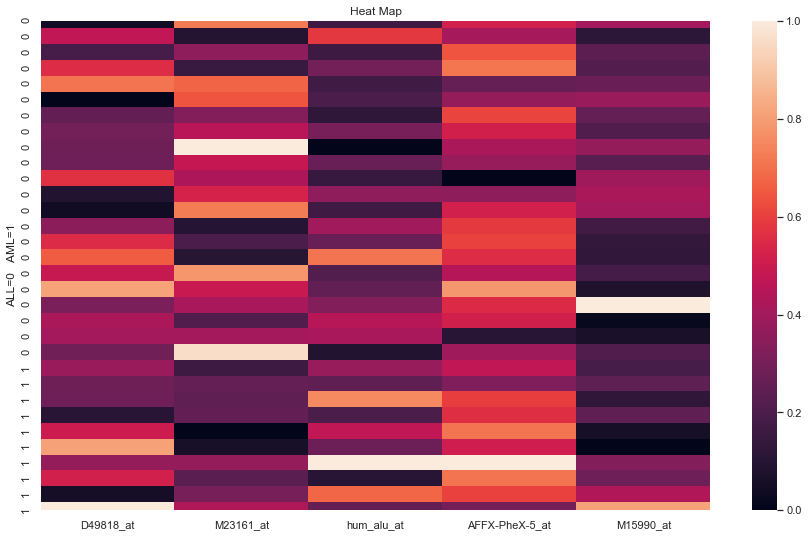

In [24]:
# Heat Map
import seaborn as sns; sns.set()
# arrange Data
df_hm = dftrain[['Cancer_type','D49818_at','M23161_at','hum_alu_at','AFFX-PheX-5_at','M15990_at']].sort_values(by=['Cancer_type'])
# prepare for plot
value = df_hm[['D49818_at','M23161_at','hum_alu_at','AFFX-PheX-5_at','M15990_at']].values
xlabel = ['D49818_at','M23161_at','hum_alu_at','AFFX-PheX-5_at','M15990_at']
ylabel = df_hm.Cancer_type.values
# plot
ax = sns.heatmap(value, xticklabels=xlabel, yticklabels=ylabel)
ax.title.set_text('Heat Map')
ax.set_ylabel('ALL=0   AML=1')

### Part 2.1.3 [2 pts]:  Discussion Questions

1. [1 pt] Notice that the results training set contains more predictors than observations. Do you foresee a problem in fitting a classification model to such a data set?

  * There is no unique solution. If rows of the matrix of data points represent cases and columns respresent predictors, there are necessarily linear dependences among the columns of the matrix.

2. [1 pt] By observing the heat map, comment on which of these genes are useful in discriminating between the two classes.

  * We pick M23161_at. From the heat map, the heat map is darker in type 'AML' and lighter in type 'ALL'.

## Part 2.2 [16 pts]:  Linear Regression vs. Logistic Regression
In this part, you will analyze the differences between using linear regression and logistic regression for classification. For this part, you will work with a single gene predictor: `D29963_at`.

### 2.2.1 [2 pts]:  Linear Regression
* Fit a simple linear regression model to the training set using the single gene predictor `D29963_at`.

#### Deliverables
Your code should be contained in a Jupyter notebook cell. An appropriate level of comments is necessary. Your code should run and output the required outputs described below.

#### Required Outputs
* Print the prediction from the linear regression model, $\widehat{y}_{\textrm{test}}$

In [25]:
# data
Xtrain = dftrain['D29963_at'].values.reshape(-1,1)
Xtest = dftest['D29963_at'].values.reshape(-1,1)
Ytrain = dftrain['Cancer_type'].values
Ytest = dftest['Cancer_type'].values
# fit
cancer_lin = LinearRegression().fit(Xtrain, Ytrain)
# print
cancer_lin.predict(Xtest)

array([ 0.3478915 ,  0.33116866,  0.06882922,  0.29929076,  0.70481946,
        0.05053863,  0.01604778, -0.01635271, -0.06443085,  0.20104412,
        0.26689027,  0.05524192,  0.9577523 ,  0.47279015,  0.29876817,
        0.48637745,  0.23867049,  0.54856549,  0.29197452,  0.07353252,
        0.63374742,  0.58305633,  0.33900749,  0.17857281,  0.25748368,
        0.18954717,  0.14303679,  0.28204534,  0.12370102,  0.24076085,
        0.32751054,  0.23971567,  0.38290493,  0.33482678,  0.23762532,
        0.23187684,  1.04606976,  0.3703628 ,  0.40589882,  0.2611418 ,
        0.4978744 ])

### 2.2.2 [2 pts]:  Convert to Classification Model
The fitted linear regression model can be converted to a classification model (i.e. a model that predicts one of two binary labels 0 or 1) by classifying patients with predicted score greater than 0.5 into the `ALL` type (class 1), and the others into the `AML` type (class 0).

* Evaluate the classification accuracy ($1$ - misclassification rate) of the obtained classification model on both the training and test sets.

#### Deliverables
Your code should be contained in a Jupyter notebook cell. An appropriate level of comments is necessary. Your code should run and output the required outputs described below.

#### Required Outputs
* Print the train accuracy and test accuracy.  For example:
```python
Train accuracy:  0.78125
Test accuracy:  0.731707317073
```

In [26]:
def calcu_accuracy(observation, prediction):
    match = 0.0
    miss = 0.0
    for i in range(observation.shape[0]):
        if (observation[i] == 1 and prediction[i] > 0.5) or (observation[i] == 0 and prediction[i] <= 0.5):
            match += 1
        else:
            miss += 1
    accu = match/(match + miss)
    
    return accu

In [27]:
train_ac = calcu_accuracy(Ytrain, cancer_lin.predict(Xtrain))
test_ac = calcu_accuracy(Ytest, cancer_lin.predict(Xtest))
print('Train accuracy: {}\nTest accuracy: {}'.format(train_ac, test_ac))

Train accuracy: 0.78125
Test accuracy: 0.7317073170731707


### 2.2.3 [2 pts]:  Logistic Regression
Fit a simple logistic regression model to the training set.
**Hint:**:  Remember, you need to set the regularization parameter for `sklearn`'s logistic regression function to be a very large value in order not to regularize (use 'C=100000').

#### Deliverables
Your code should be contained in a Jupyter notebook cell. An appropriate level of comments is necessary. Your code should run and output the required outputs described below.

#### Required Outputs
* Print the train and test accuracy.  For example:
```python
Train accuracy:  0.75
Test accuracy:  0.80487804878
```

In [28]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver='lbfgs', C=100000).fit(Xtrain, Ytrain)

train_ac_log = calcu_accuracy(Ytrain, log.predict(Xtrain))
test_ac_log = calcu_accuracy(Ytest, log.predict(Xtest))
print('Train accuracy: {}\nTest accuracy: {}'.format(train_ac_log, test_ac_log))

Train accuracy: 0.75
Test accuracy: 0.8048780487804879


### 2.2.4 [5 pts]:  Visualize Results
* Plot the quantitative output from linear regression model and the probabilistic output from the logistic regression model (on the training set points) as a function of the gene predictor.
* Display the true binary response for the training set points in the same plot.

#### Deliverables
Your code should be contained in a Jupyter notebook cell. An appropriate level of comments is necessary. Your code should run and output the required outputs described below.

#### Required Outputs
1. One figure containing three plots side-by-side:
  a. The left plot should be the `OLS` prediction
  b. The middle plot should be the logistic prediction
  c. The right plot should be the true binary response
2. Make the same plot for the test set points.
3. Be sure to properly annotate your figures (label $x$ and $y$ axes, put a title, put a legend)

**Hint**:  For side-by-side plots, consider using the construct:
```python
fig, ax = plt.subplots(1,3, figsize=(10,6))
ax[0].plot(...) # left plot
ax[1].plot(...) # middle plot
ax[2].plot(...) # right plot
```

In [43]:
#classify
def clf(prediction):
    for i in range(prediction.shape[0]):
        if (prediction[i] >= 0.5):
            prediction[i] = 1
        else:
            prediction[i] = 0
    return prediction

In [44]:
train_clf = clf(cancer_lin.predict(Xtrain))
test_clf = clf(cancer_lin.predict(Xtest))

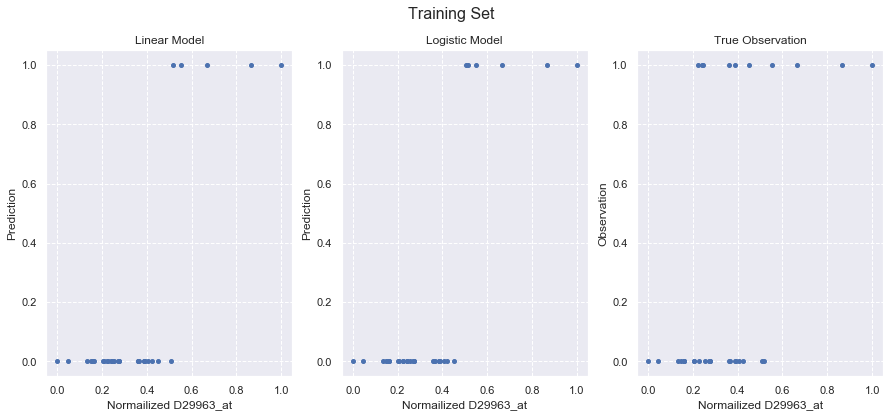

In [45]:
plt.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(1,3, figsize=(15,6))
fig.suptitle('Training Set', fontsize=16)
ax[0].plot(Xtrain, train_clf, 'o', ms=4) # left plot
ax[0].grid(linestyle='--', linewidth=1)
ax[0].set_xlabel('Normailized D29963_at')
ax[0].set_ylabel('Prediction')
ax[0].title.set_text('Linear Model')

ax[1].plot(Xtrain, log.predict(Xtrain), 'o', ms=4) # middle plot
ax[1].grid(linestyle='--', linewidth=1)
ax[1].set_xlabel('Normailized D29963_at')
ax[1].set_ylabel('Prediction')
ax[1].title.set_text('Logistic Model')

ax[2].plot(Xtrain, Ytrain, 'o', ms=4) # right plot
ax[2].grid(linestyle='--', linewidth=1)
ax[2].set_xlabel('Normailized D29963_at')
ax[2].set_ylabel('Observation')
ax[2].title.set_text('True Observation')

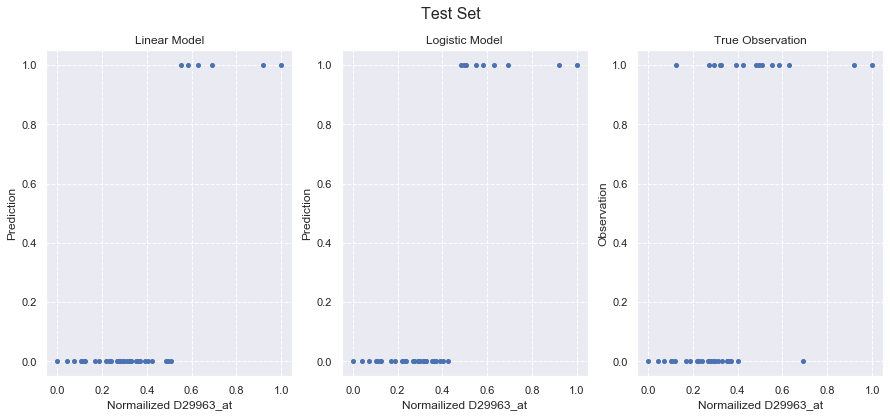

In [46]:
fig, ax = plt.subplots(1,3, figsize=(15,6))
fig.suptitle('Test Set', fontsize=16)
ax[0].plot(Xtest, test_clf, 'o', ms=4) # left plot
ax[0].grid(linestyle='--', linewidth=1)
ax[0].set_xlabel('Normailized D29963_at')
ax[0].set_ylabel('Prediction')
ax[0].title.set_text('Linear Model')

ax[1].plot(Xtest, log.predict(Xtest), 'o', ms=4) # middle plot
ax[1].grid(linestyle='--', linewidth=1)
ax[1].set_xlabel('Normailized D29963_at')
ax[1].set_ylabel('Prediction')
ax[1].title.set_text('Logistic Model')

ax[2].plot(Xtest, Ytest, 'o', ms=4) # right plot
ax[2].grid(linestyle='--', linewidth=1)
ax[2].set_xlabel('Normailized D29963_at')
ax[2].set_ylabel('Observation')
ax[2].title.set_text('True Observation')

### 2.2.5 [3 pts]:  Discussion Questions
1. [1 pt] We could interpret the scores predicted by regression model (part $2.2.1$) interpreted for a patient as an estimate of the probability that the patient has the `ALL` type cancer (class 1). Is there a problem with this interpretation?

  * This number does not indicate probability, but merely indicates a correlation. It is wrong to explain these numbers from a probabilistic perspective.
  

2. [1 pt] How does the training and test classification accuracy of the logistic regression model compare with the linear regression model?

  * Logistic Regression training accuracy is less than the linear one, but Logistic Regression test accuracy is bigger than the linear one. The accuracy for the linear model depends on where we set the boundary line.


3. [1 pt] Based on these plots in part $2.2.4$, does one of the models appear better suited for binary classification than the other? Explain.

  * From the image alone we can't say which regression model is better. 